<a href="https://colab.research.google.com/github/AimalNaqvi384/ChallangeTUAI/blob/main/FINAL_TUAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import os


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [ ]:


import xgboost as xgb
print("XGBoost version:", xgb.__version__)

from catboost import CatBoostRegressor, Pool
#print("CatBoost version:", CatBoostRegressor().version)

from lightgbm import LGBMRegressor
#print("LightGBM version:", LGBMRegressor.__version__)


XGBoost version: 2.1.4


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
import pandas as pd

# Load the dataset
train = pd.read_csv('train.csv')

train.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:

test = pd.read_csv('test.csv')
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
oil_data = pd.read_csv('oil.csv')
oil_data.head()


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
holidays_data = pd.read_csv('holidays_events.csv')
holidays_data.head()


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
store_data = pd.read_csv('stores.csv')
store_data.head()


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


<ipython-input-16-7cca5888e264>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='coolwarm')


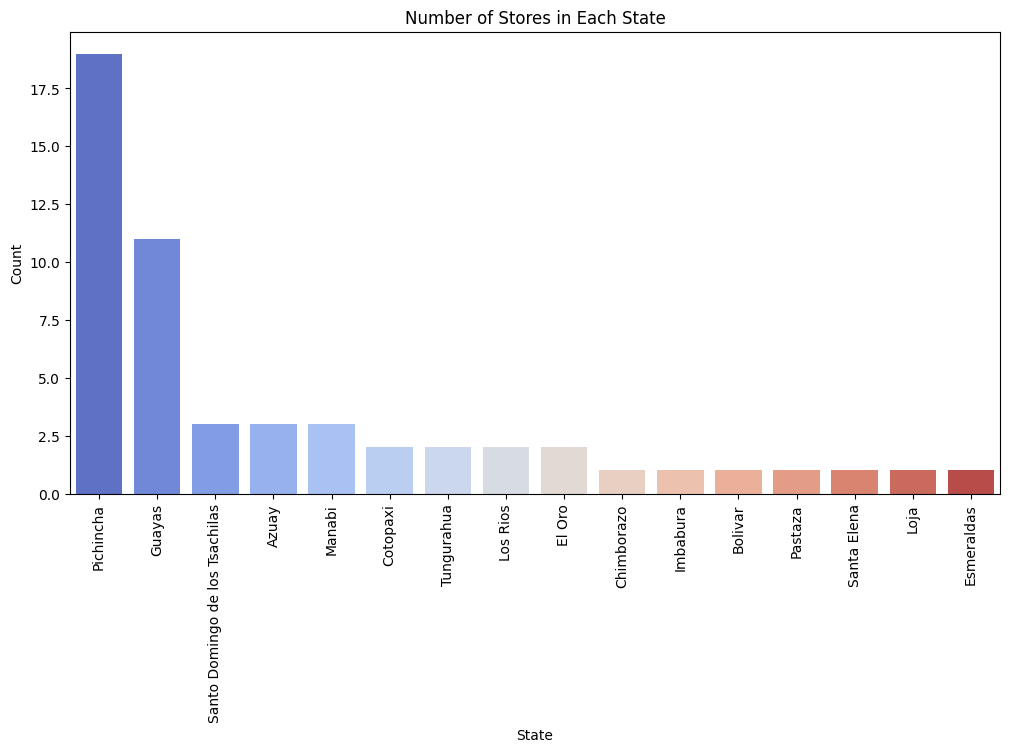

In [ ]:

#Graph
state_counts = store_data['state'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='coolwarm')
plt.title('Number of Stores in Each State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<ipython-input-17-9ead9a944f38>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette='Dark2')


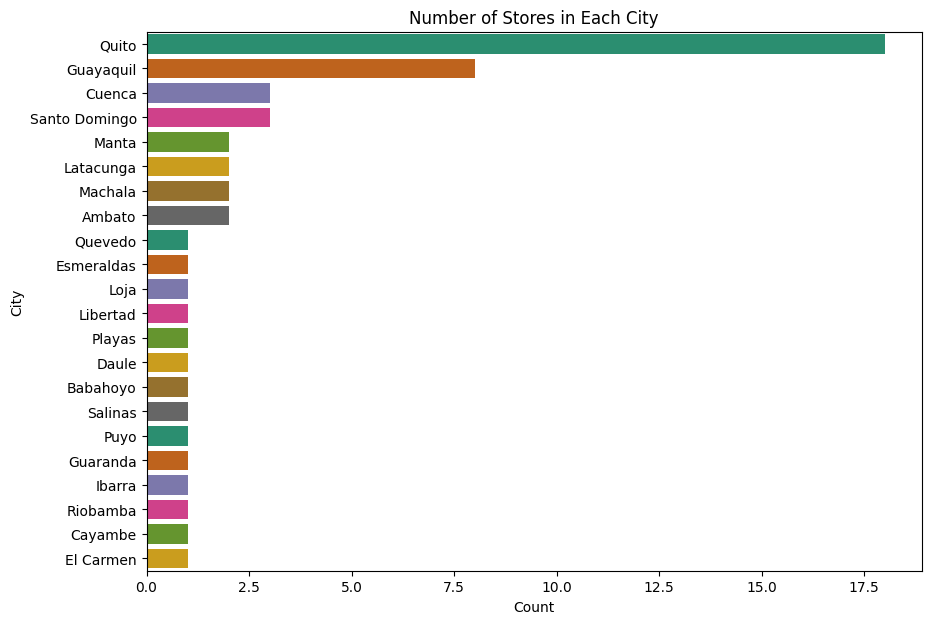

In [ ]:

city_counts = store_data['city'].value_counts()

plt.figure(figsize=(10, 7))
sns.barplot(x=city_counts.values, y=city_counts.index, palette='Dark2')
plt.title('Number of Stores in Each City')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

<ipython-input-18-e09641b8a152>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="Dark2")


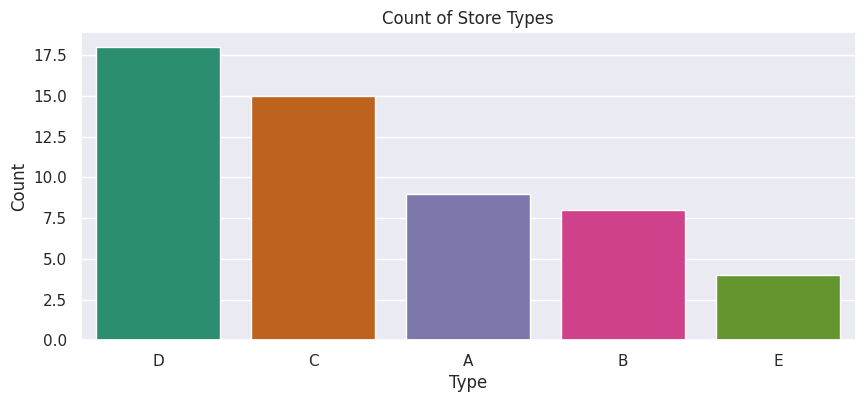

In [ ]:
#exploring type column
type_counts = store_data['type'].value_counts()

sns.set(rc={"figure.figsize": (10, 4)})
sns.barplot(x=type_counts.index, y=type_counts.values, palette="Dark2")
plt.title("Count of Store Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [ ]:

unique_values = len(store_data['store_nbr'].unique())
print("Number of unique values in 'store_nbr':", unique_values)

Number of unique values in 'store_nbr': 54


In [ ]:
transactions_data = pd.read_csv('transactions.csv')
transactions_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:

fig = px.line(transactions_data, x=transactions_data.index, y='transactions', title='Transaction Time Series')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

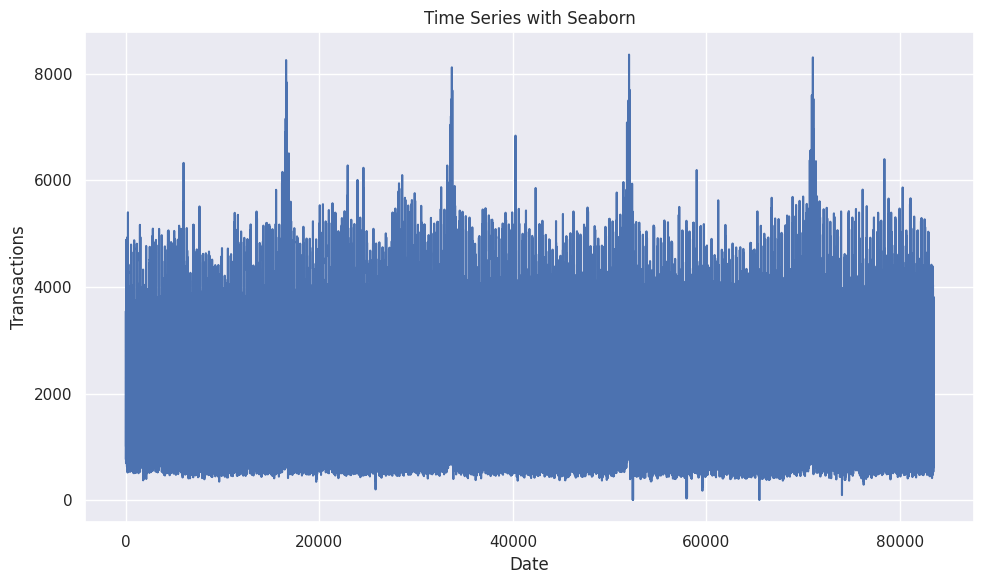

In [ ]:
##using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=transactions_data, x=transactions_data.index, y='transactions')
plt.title('Time Series with Seaborn')
plt.xlabel('Date')
plt.ylabel('Transactions')

plt.tight_layout()

plt.show()

<Axes: >

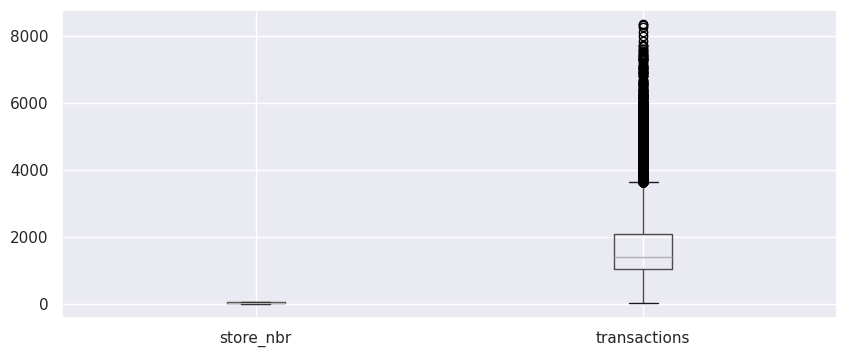

In [ ]:
# check for outliers
transactions_data.boxplot()

In [ ]:

transactions_data["store_nbr"].unique()

array([25,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39,
       40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 36, 53, 20, 29, 21,
       42, 22, 52])

Text(0.5, 1.0, 'Top 10 Store with the Highest Transactions')

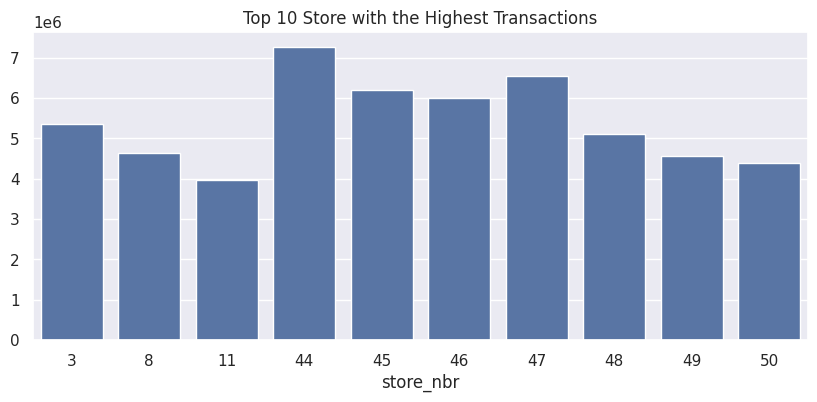

In [ ]:

store_tran= transactions_data.groupby("store_nbr")["transactions"].agg("sum").sort_values(ascending= False).head(10)

sns.barplot(x=store_tran.index, y=store_tran.values)


plt.title('Top 10 Store with the Highest Transactions')

In [ ]:
holidays_data["type"].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [ ]:
train['dataset'] = 'train'
test['dataset'] = 'test'

df = pd.concat([train, test], axis=0).reset_index(drop=True)

In [ ]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,dataset
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,train
1,1,2013-01-01,1,BABY CARE,0.0,0,train
2,2,2013-01-01,1,BEAUTY,0.0,0,train
3,3,2013-01-01,1,BEVERAGES,0.0,0,train
4,4,2013-01-01,1,BOOKS,0.0,0,train


In [ ]:
df['onpromotion'].fillna(0, inplace=True)


<ipython-input-29-b2689a0760cb>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
print(df.columns)
print(oil_data.columns)
print(holidays_data.columns)
print(store_data.columns)
print(transactions_data.columns)

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'dataset'], dtype='object')
Index(['date', 'dcoilwtico'], dtype='object')
Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')
Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')
Index(['date', 'store_nbr', 'transactions'], dtype='object')


In [ ]:
holidays_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
holidays_data["type"].value_counts()

,count
type,
Holiday,221
Event,56
Additional,51
Transfer,12
Bridge,5
Work Day,5


<ipython-input-33-4b4a364834a6>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




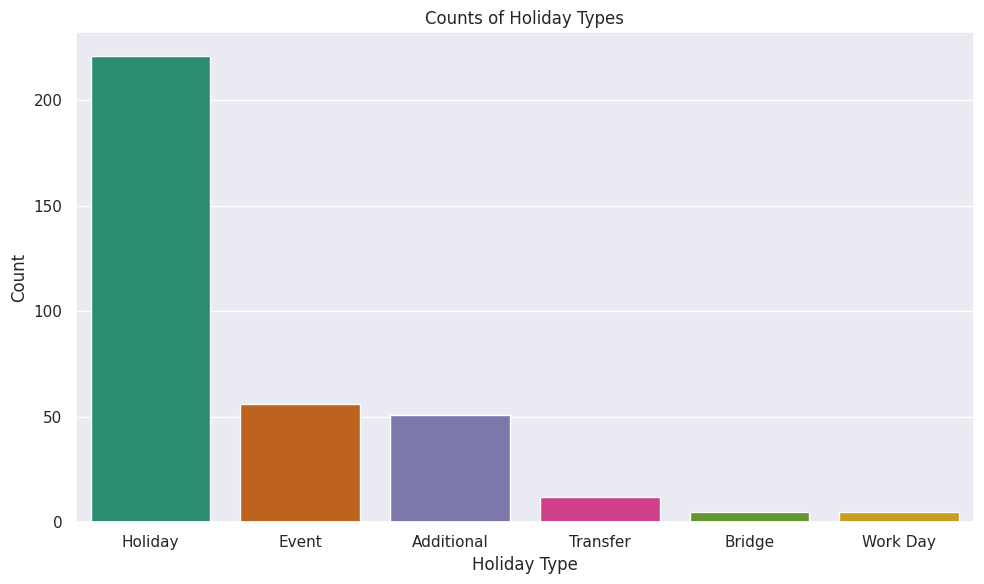

In [ ]:
type_counts = holidays_data["type"].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="Dark2")
plt.title('Counts of Holiday Types')
plt.xlabel('Holiday Type')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

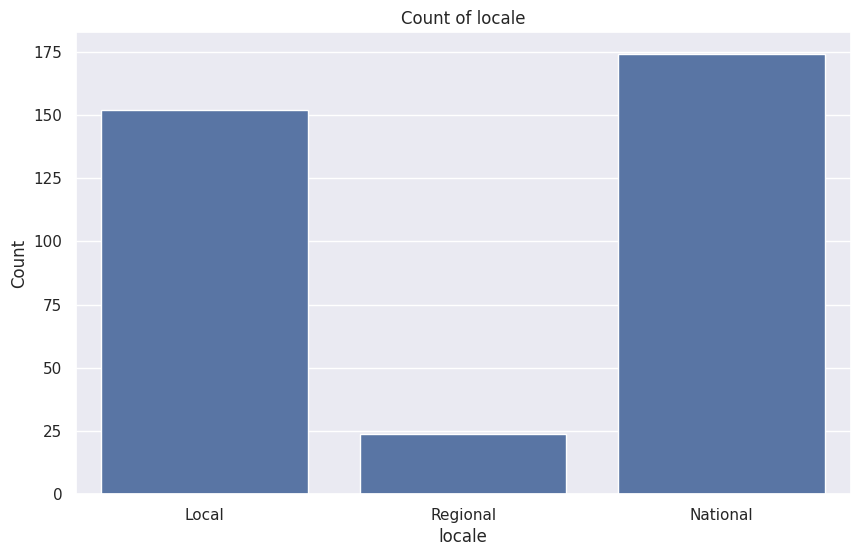

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(data=holidays_data, x="locale")
plt.title(f'Count of {"locale"}')
plt.xlabel("locale")
plt.ylabel('Count')
plt.show()

In [ ]:
holidays_data[holidays_data['transferred'] == True]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


In [ ]:
holidays_data["transferred"].value_counts()

,count
transferred,
False,338
True,12


In [ ]:
holidays_data[holidays_data['type'] == 'Transfer']

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


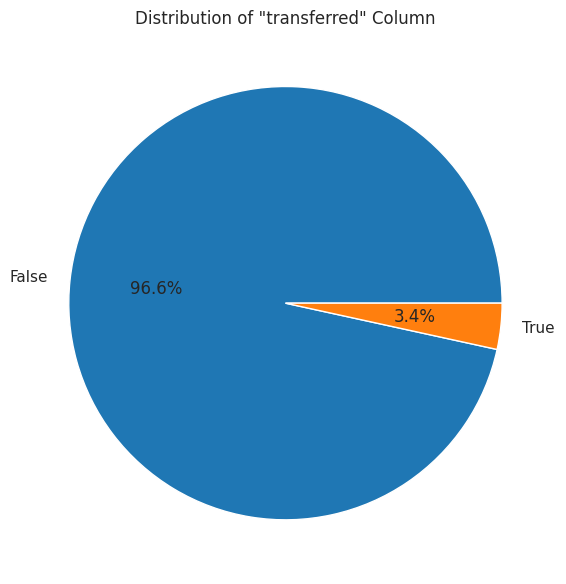

In [ ]:
transferred_counts = holidays_data["transferred"].value_counts()

# Create a pie chart using matplotlib
plt.figure(figsize=(6, 6))
plt.pie(transferred_counts, labels=transferred_counts.index,  colors=['#1f77b4', '#ff7f0e'], autopct='%1.1f%%')
plt.title('Distribution of "transferred" Column')
plt.tight_layout()

plt.show()

In [ ]:
holidays_data.loc[holidays_data['type'] == 'Transfer', 'type'] = 'Holiday'

In [ ]:
holidays_data['Holiday summary'] = (
    holidays_data['type'].astype(str) + " " +
    holidays_data['locale'].astype(str) + " " +
    holidays_data['locale_name'].astype(str) + " "
)

In [ ]:
holidays_data= holidays_data.drop(columns=['type', 'locale', 'locale_name', 'description'] , errors='ignore' )

In [ ]:
holidays_data['Holiday summary'].value_counts()

,count
Holiday summary,
Holiday National Ecuador,68
Event National Ecuador,56
Additional National Ecuador,40
Holiday Local Ambato,12
Holiday Local Riobamba,12
Holiday Local Guaranda,12
Holiday Local Latacunga,12
Holiday Local Ibarra,7
Holiday Local Cuenca,7


In [ ]:
store_data


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [ ]:
transactions_data


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [ ]:
df = df.merge(oil_data, on='date', how='left')

df = df.merge(holidays_data, on='date', how='left')

df = df.merge(store_data, on='store_nbr', how='left')

df = df.merge(transactions_data, on=['date', 'store_nbr'], how='left')

In [ ]:
df.sample(10)

,id,date,store_nbr,family,sales,onpromotion,dataset,dcoilwtico,transferred,Holiday summary,city,state,type,cluster,transactions
980604,966348,2014-06-28,23,DELI,109.83800,0,train,NaN,False,Event National Ecuador,Ambato,Tungurahua,D,9,1128.0
729448,720538,2014-02-10,26,HOME AND KITCHEN II,0.00000,0,train,100.12,NaN,NaN,Guayaquil,Guayas,D,10,528.0
2339270,2298284,2016-07-16,44,SEAFOOD,138.18100,1,train,NaN,NaN,NaN,Quito,Pichincha,A,5,4816.0
2360355,2317587,2016-07-27,36,PRODUCE,858.15497,2,train,41.90,NaN,NaN,Libertad,Guayas,E,10,881.0
3020049,2966589,2017-07-27,46,LINGERIE,12.00000,0,train,49.05,NaN,NaN,Quito,Pichincha,A,14,2821.0
1329662,1310060,2015-01-08,17,PET SUPPLIES,0.00000,0,train,48.80,NaN,NaN,Quito,Pichincha,C,12,1271.0
1612578,1592976,2015-06-15,6,AUTOMOTIVE,5.00000,0,train,59.53,NaN,NaN,Quito,Pichincha,D,13,1620.0
119406,119406,2013-03-09,1,GROCERY I,1972.00000,0,train,NaN,NaN,NaN,Quito,Pichincha,D,13,1337.0
2165651,2138921,2016-04-18,23,PET SUPPLIES,4.00000,0,train,39.74,False,Event National Ecuador,Ambato,Tungurahua,D,9,1270.0
610060,602932,2013-12-05,26,"LIQUOR,WINE,BEER",21.00000,0,train,97.14,False,Additional Local Quito,Guayaquil,Guayas,D,10,744.0


In [ ]:
print("\nSummary Statistics for Numerical Columns:")
df.describe()


Summary Statistics for Numerical Columns:


,id,store_nbr,sales,onpromotion,dcoilwtico,cluster,transactions
count,3.082860e+06,3.082860e+06,3.054348e+06,3.082860e+06,2.120580e+06,3.082860e+06,2.805231e+06
mean,1.518250e+06,2.750000e+01,3.590209e+02,2.657692e+00,6.780640e+01,8.481481e+00,1.697071e+03
std,8.742912e+05,1.558579e+01,1.107286e+03,1.236626e+01,2.564571e+01,4.649735e+00,9.668317e+02
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,1.000000e+00,5.000000e+00
25%,7.618048e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.646000e+01,4.000000e+00,1.046000e+03
50%,1.521828e+06,2.750000e+01,1.100000e+01,0.000000e+00,5.325000e+01,8.500000e+00,1.395000e+03
75%,2.272940e+06,4.100000e+01,1.960110e+02,0.000000e+00,9.572000e+01,1.300000e+01,2.081000e+03
max,3.029399e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,1.700000e+01,8.359000e+03


In [ ]:
df["dcoilwtico"]=df["dcoilwtico"].fillna(method="ffill").fillna(method="bfill")

<ipython-input-48-0b5e75856ecc>:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [ ]:
df["dcoilwtico"].isnull().sum()

0

In [ ]:
#plot our oil time series
fig = px.line(oil_data, x=oil_data.index, y='dcoilwtico',title='Oil Time Series')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

Text(0.5, 1.0, 'Oil Time Series')

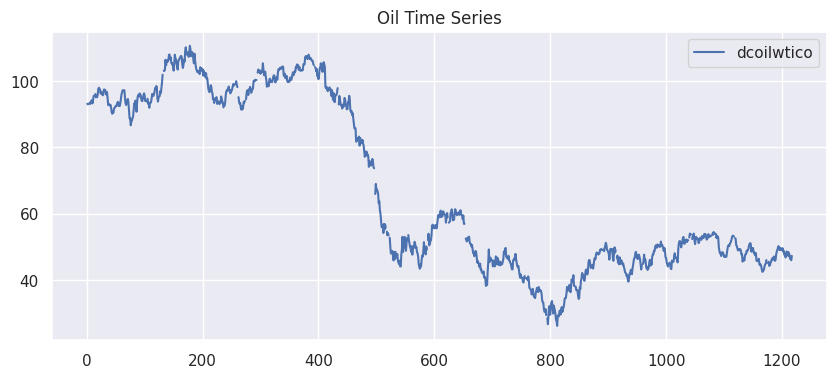

In [ ]:

##using matplotlib
ax=oil_data.plot()

plt.title('Oil Time Series')

In [ ]:

df['transactions'] = df.groupby('family')['transactions'].transform(
    lambda x: x.fillna(x.median())
)
df["transactions"].isnull().sum()

0

In [ ]:
df["is_holiday"]=df["Holiday summary"].fillna('Not Holiday').apply(lambda x: 0 if x == 'Not Holiday' else 1)
df["is_holiday"].unique().sum()

1

In [ ]:
df.isnull().sum()

,0
id,0
date,0
store_nbr,0
family,0
sales,28512
onpromotion,0
dataset,0
dcoilwtico,0
transferred,2578554
Holiday summary,2578554


In [ ]:
df['transactions'] = df.groupby('family')['transactions'].transform(
    lambda x: x.fillna(x.median())
)
df['transactions'].fillna(method='ffill', inplace=True)
df['transactions'].fillna(df['transactions'].mean(), inplace=True)

<ipython-input-55-85ae2d66143f>:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-55-85ae2d66143f>:4: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

<ipython-input-55-85ae2d66143f>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

In [ ]:
df = df.drop(columns=['transferred', 'Holiday summary'], errors='ignore')

In [ ]:
import datetime as dt
df['date'] = pd.to_datetime(df['date'])
df["year"] = df['date'].dt.year
df["month"] = df["date"].dt.month
df["day"] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

In [ ]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,dataset,dcoilwtico,city,state,type,cluster,transactions,is_holiday,year,month,day,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,train,93.14,Quito,Pichincha,D,13,1395.0,1,2013,1,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,train,93.14,Quito,Pichincha,D,13,1395.0,1,2013,1,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,train,93.14,Quito,Pichincha,D,13,1395.0,1,2013,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,train,93.14,Quito,Pichincha,D,13,1395.0,1,2013,1,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,train,93.14,Quito,Pichincha,D,13,1395.0,1,2013,1,1,1


In [ ]:
df['family'].value_counts()
df.groupby('family', as_index=False).agg(
    sales_count=('sales', 'count'),
    sales_mean=('sales', 'mean')
).sort_values(by='sales_mean', ascending=False)[:10]

,family,sales_count,sales_mean
12,GROCERY I,92556,3790.432797
3,BEVERAGES,92556,2394.912701
30,PRODUCE,92556,1355.373698
7,CLEANING,92556,1074.171518
8,DAIRY,92556,711.175991
5,BREAD/BAKERY,92556,464.150612
28,POULTRY,92556,351.078816
24,MEATS,92556,341.965905
25,PERSONAL CARE,92556,271.192381
9,DELI,92556,265.629746


In [ ]:
df.groupby('store_nbr', as_index=False).agg(
    sales_count=('sales', 'count'),
    sales_mean=('sales', 'mean')
).sort_values(by='sales_mean', ascending=False)[:10]

,store_nbr,sales_count,sales_mean
43,44,56562,1120.118405
44,45,56562,984.565998
46,47,56562,919.777871
2,3,56562,911.098054
48,49,56562,784.039156
45,46,56562,756.775349
47,48,56562,649.584599
50,51,56562,594.106667
7,8,56562,550.264615
49,50,56562,517.551554


In [ ]:
df=pd.get_dummies(df,columns=["store_nbr","family"],dtype=int, drop_first=True)

In [ ]:
pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder




# Function for Target Encoding multiple categorical columns
def target_encoding_multiple_columns(df, target_column, categorical_columns, dataset_column='dataset'):

    for col in categorical_columns:
        # Calculate target mean for each category in the column using training data
        target_mean = df[df[dataset_column] == 'train'].groupby(col)[target_column].mean()

        # Map the target mean encoding to the entire dataset
        df[f'{col}_encoded'] = df[col].map(target_mean)

        # Handle missing values for categories not present in training
        df[f'{col}_encoded'].fillna(df[target_column].mean(), inplace=True)
        return df


categorical_columns = ['month', 'day', 'year', 'day_of_week']
df = target_encoding_multiple_columns(df, target_column='sales', categorical_columns=categorical_columns)


# Drop unnecessary columns
columns_to_drop = [
    'locale_name', 'description', 'transferred', 'city', 'state', 'family',
    'month', 'day_of_week', 'day', 'year', 'cluster', 'type'
]
df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
df.columns


<ipython-input-63-f28d3a945dce>:18: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Index(['id', 'date', 'sales', 'onpromotion', 'dataset', 'dcoilwtico',
       'transactions', 'is_holiday', 'store_nbr_2', 'store_nbr_3',
       'store_nbr_4', 'store_nbr_5', 'store_nbr_6', 'store_nbr_7',
       'store_nbr_8', 'store_nbr_9', 'store_nbr_10', 'store_nbr_11',
       'store_nbr_12', 'store_nbr_13', 'store_nbr_14', 'store_nbr_15',
       'store_nbr_16', 'store_nbr_17', 'store_nbr_18', 'store_nbr_19',
       'store_nbr_20', 'store_nbr_21', 'store_nbr_22', 'store_nbr_23',
       'store_nbr_24', 'store_nbr_25', 'store_nbr_26', 'store_nbr_27',
       'store_nbr_28', 'store_nbr_29', 'store_nbr_30', 'store_nbr_31',
       'store_nbr_32', 'store_nbr_33', 'store_nbr_34', 'store_nbr_35',
       'store_nbr_36', 'store_nbr_37', 'store_nbr_38', 'store_nbr_39',
       'store_nbr_40', 'store_nbr_41', 'store_nbr_42', 'store_nbr_43',
       'store_nbr_44', 'store_nbr_45', 'store_nbr_46', 'store_nbr_47',
       'store_nbr_48', 'store_nbr_49', 'store_nbr_50', 'store_nbr_51',
       'store_nbr

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np


train_df = df[df['dataset'] == 'train'].drop(columns=['dataset'], errors='ignore')
test_df = df[df['dataset'] == 'test'].drop(columns=['dataset'], errors='ignore')

train_df = train_df.drop(columns=['transactions', 'id'], errors='ignore')
test_df = test_df.drop(columns=['transactions'], errors='ignore')

train_df = train_df.sort_values(by='date')

split_ratio = 0.80
split_index = int(len(train_df) * split_ratio)

# Create training and validation sets
X_train = train_df.iloc[:split_index].drop(columns=['sales'])
y_train = train_df.iloc[:split_index]['sales']
X_val = train_df.iloc[split_index:].drop(columns=['sales'])
y_val = train_df.iloc[split_index:]['sales']

# Log transform the target variables to stabilize variance
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)

X_train = X_train.drop(columns=['date'], errors='ignore')
X_val = X_val.drop(columns=['date'], errors='ignore')

X_test = test_df.drop(columns=['sales'], errors='ignore')

In [ ]:
X_val

,onpromotion,dcoilwtico,is_holiday,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,store_nbr_8,...,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,month_encoded
2444183,12,46.28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,362.297418
2444182,0,46.28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,362.297418
2444193,0,46.28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,362.297418
2444181,12,46.28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,362.297418
2444207,1,46.28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,362.297418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053153,0,47.57,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,336.992535
3053152,8,47.57,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,336.992535
3053151,0,47.57,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,336.992535
3053162,0,47.57,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,336.992535


In [ ]:
X_test


,id,date,onpromotion,dcoilwtico,is_holiday,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,...,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,month_encoded
3054348,3000888,2017-08-16,0,46.80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,336.992535
3054349,3000889,2017-08-16,0,46.80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,336.992535
3054350,3000890,2017-08-16,2,46.80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,336.992535
3054351,3000891,2017-08-16,20,46.80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,336.992535
3054352,3000892,2017-08-16,0,46.80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,336.992535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,1,47.26,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,336.992535
3082856,3029396,2017-08-31,0,47.26,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,336.992535
3082857,3029397,2017-08-31,1,47.26,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,336.992535
3082858,3029398,2017-08-31,9,47.26,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,336.992535


[0]	validation_0-rmse:2.59526
[50]	validation_0-rmse:1.04524
[100]	validation_0-rmse:0.98437
[136]	validation_0-rmse:0.97319
Validation RMSE: 1091.5183


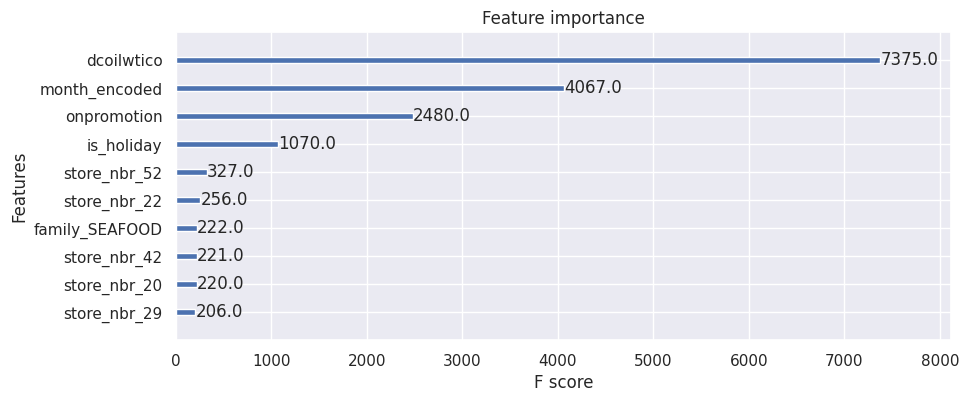

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:date: datetime64[ns]

In [ ]:


# Define XGBoost model with eval_metric inside constructor
#xgb_model = xgb.XGBRegressor(
 #   objective="reg:squarederror",
 #   n_estimators=500,
 #   learning_rate=0.1,
#    max_depth=8,
#    subsample=0.8,
#    colsample_bytree=0.8,
#    random_state=42,
#    early_stopping_rounds=10,
#    eval_metric="rmse"
#)

# Train model
#xgb_model.fit(
 #   X_train, y_train,
 #   eval_set=[(X_val, y_val)],
 #   verbose=50
#)



# Predict on validation set
#y_pred = xgb_model.predict(X_val)
#y_pred = np.expm1(y_pred)  # Inverse log transform

# Evaluate model
#rmse = np.sqrt(mean_squared_error(y_val, y_pred))
#print(f"Validation RMSE: {rmse:.4f}")

# Feature Importance
#xgb.plot_importance(xgb_model, importance_type="weight", max_num_features=10)
#plt.show()

# Predict Sales
#test_df["sales"] = np.expm1(xgb_model.predict(test_df.drop(columns=["id"], errors="ignore")))



In [ ]:
from catboost import CatBoostRegressor, Pool

train_pool = Pool(X_train, y_train)
val_pool = Pool(X_val, y_val)

catboost_model = CatBoostRegressor(
    iterations=5000,
    learning_rate=0.1,
    depth=8,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=50,
    early_stopping_rounds=10
)
train_loop_count = 25
init_model = None

for i in range(train_loop_count):
    print(f"\nTraining Stage {i + 1}/{train_loop_count}\n")
    catboost_model.fit(
        train_pool,
        eval_set=val_pool,
        early_stopping_rounds=50,
        verbose=100,
        use_best_model=True,
        init_model=init_model
    )
    init_model = catboost_model


Training Stage 1/25

0:	learn: 2.5778334	test: 2.4941127	best: 2.4941127 (0)	total: 232ms	remaining: 19m 21s
100:	learn: 1.1263962	test: 1.0609578	best: 1.0599733 (99)	total: 23.1s	remaining: 18m 42s
200:	learn: 0.9695493	test: 0.9950238	best: 0.9950238 (200)	total: 45.6s	remaining: 18m 9s
300:	learn: 0.8928161	test: 0.9776009	best: 0.9775057 (298)	total: 1m 9s	remaining: 18m 3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9767148627
bestIteration = 305

Shrink model to first 306 iterations.

Training Stage 2/25

0:	learn: 0.8873235	test: 0.9774148	best: 0.9774148 (0)	total: 295ms	remaining: 24m 32s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9763875655
bestIteration = 25

Shrink model to first 26 iterations.

Training Stage 3/25

0:	learn: 0.8738154	test: 0.9759676	best: 0.9759676 (0)	total: 212ms	remaining: 17m 37s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9759676215
bestIteration = 0

Shrink model to first 1 i

In [ ]:
print("X_train Columns:", X_train.columns)

X_train Columns: Index(['onpromotion', 'dcoilwtico', 'is_holiday', 'store_nbr_2', 'store_nbr_3',
       'store_nbr_4', 'store_nbr_5', 'store_nbr_6', 'store_nbr_7',
       'store_nbr_8', 'store_nbr_9', 'store_nbr_10', 'store_nbr_11',
       'store_nbr_12', 'store_nbr_13', 'store_nbr_14', 'store_nbr_15',
       'store_nbr_16', 'store_nbr_17', 'store_nbr_18', 'store_nbr_19',
       'store_nbr_20', 'store_nbr_21', 'store_nbr_22', 'store_nbr_23',
       'store_nbr_24', 'store_nbr_25', 'store_nbr_26', 'store_nbr_27',
       'store_nbr_28', 'store_nbr_29', 'store_nbr_30', 'store_nbr_31',
       'store_nbr_32', 'store_nbr_33', 'store_nbr_34', 'store_nbr_35',
       'store_nbr_36', 'store_nbr_37', 'store_nbr_38', 'store_nbr_39',
       'store_nbr_40', 'store_nbr_41', 'store_nbr_42', 'store_nbr_43',
       'store_nbr_44', 'store_nbr_45', 'store_nbr_46', 'store_nbr_47',
       'store_nbr_48', 'store_nbr_49', 'store_nbr_50', 'store_nbr_51',
       'store_nbr_52', 'store_nbr_53', 'store_nbr_54', 'f

In [ ]:
test_features = test_df.drop(columns=['id', 'date'], errors='ignore')
test_features = test_features.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
# Predict using the trained CatBoost model
test_df['sales'] = catboost_model.predict(test_features)

In [ ]:

import shap
import matplotlib.pyplot as plt


if 'xgb_model' in globals():
    explainer = shap.Explainer(xgb_model)
    model_name = "XGBoost"
elif 'lgb_model' in globals():
    explainer = shap.Explainer(lgb_model)
    model_name = "LightGBM"
elif 'catboost_model' in globals():
    explainer = shap.Explainer(catboost_model)
    model_name = "CatBoost"
else:
    raise ValueError("No recognized model found. Ensure your trained model is available.")


shap_values = explainer(X_val)

# SHAP Summary Plot (Feature Importance)
print(f"\nSHAP Summary for {model_name} Model:")
shap.summary_plot(shap_values, X_val)

#  Feature Importance Bar Plot
shap.plots.bar(shap_values)

# Explain an Individual Prediction (First Instance)
print("\nExplaining first test sample prediction:")
shap.plots.waterfall(shap_values[0])

# SHAP Dependence Plot
shap.dependence_plot(0, shap_values.values, X_val)


In [ ]:
test_df['sales'] = np.expm1(test_df['sales'])

In [ ]:
test_df.sample(15)



,id,date,sales,onpromotion,dcoilwtico,is_holiday,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,...,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,month_encoded
3059661,3006201,2017-08-18,8.986933,0,48.59,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,336.992535
3075016,3021556,2017-08-27,378.334225,1,47.65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,336.992535
3055272,3001812,2017-08-16,2.391215,0,46.80,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,336.992535
3062130,3008670,2017-08-20,5.256332,0,48.59,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,336.992535
3073181,3019721,2017-08-26,4.153598,0,47.65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,336.992535
3067232,3013772,2017-08-23,0.581407,0,48.45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,336.992535
3065272,3011812,2017-08-22,0.041923,0,47.65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,336.992535
3077676,3024216,2017-08-29,295.407281,43,46.46,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,336.992535
3071734,3018274,2017-08-25,1215.221619,43,47.65,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,336.992535
3068175,3014715,2017-08-23,17.786540,0,48.45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,336.992535


In [ ]:

# Create submission file
submission = test_df[['id', 'sales']]
submission.sample(15)


,id,sales
3081623,3028163,0.712024
3067422,3013962,3.844326
3062053,3008593,7.239655
3063581,3010121,-0.461052
3059150,3005690,0.208135
3065512,3012052,32.318916
3078480,3025020,237.979500
3069220,3015760,41.967080
3062568,3009108,2303.445763
3067082,3013622,42.576918


In [ ]:
submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")


Submission file created: submission.csv
